### Îî•Îü¨Îãù CNN ÌîÑÎ°úÏ†ùÌä∏ Î≥¥Í≥†ÏÑú 

#### ÏöîÍ∞Ä ÏûêÏÑ∏ Î∂ÑÎ•ò
- ÏÇ¨Ï†Ñ ÌõàÎ†® Î™®Îç∏ + Î∂ÑÎ•òÍ∏∞(Í≥†Ïö©Îüâ)
- Ïã∏Ïù¥ÌÅ¥ Î≥Ñ ÎÇ¥Ïö© Î≥¥Í≥†

Îç∞Ïù¥ÌÑ∞ Ïù¥ÎØ∏ÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/Yoga/original/'

idg = ImageDataGenerator(rescale=1./255)

generator = idg.flow_from_directory(root, target_size = (150, 150), batch_size=32, class_mode='categorical')
# print(generator.class_indices)

Found 5991 images belonging to 107 classes.


In [3]:
target_name = {v : k for k, v in generator.class_indices.items()}
# print(target_name)

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def show_images(generator, ncols=8):

    random_indices = np.random.choice(len(generator.filepaths), 8, replace=False)
    #print(random_indices)

    target_name = {v : k for k, v in generator.class_indices.items()}
    
    target_names = []
    
    for target in generator.classes:
        target_names.append(target_name[target])

    # print(target_names)
    images = []
    indices= []

    
    for index in random_indices:
        image = cv2.cvtColor(cv2.imread(generator.filepaths[index]), cv2.COLOR_BGR2RGB)
        images.append(image)
        indices.append(index)
    
    fig, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i, index in zip(range(ncols), indices):
        axes[i].imshow(images[i])
        axes[i].axis('off')
        axes[i].set_title(target_names[index])


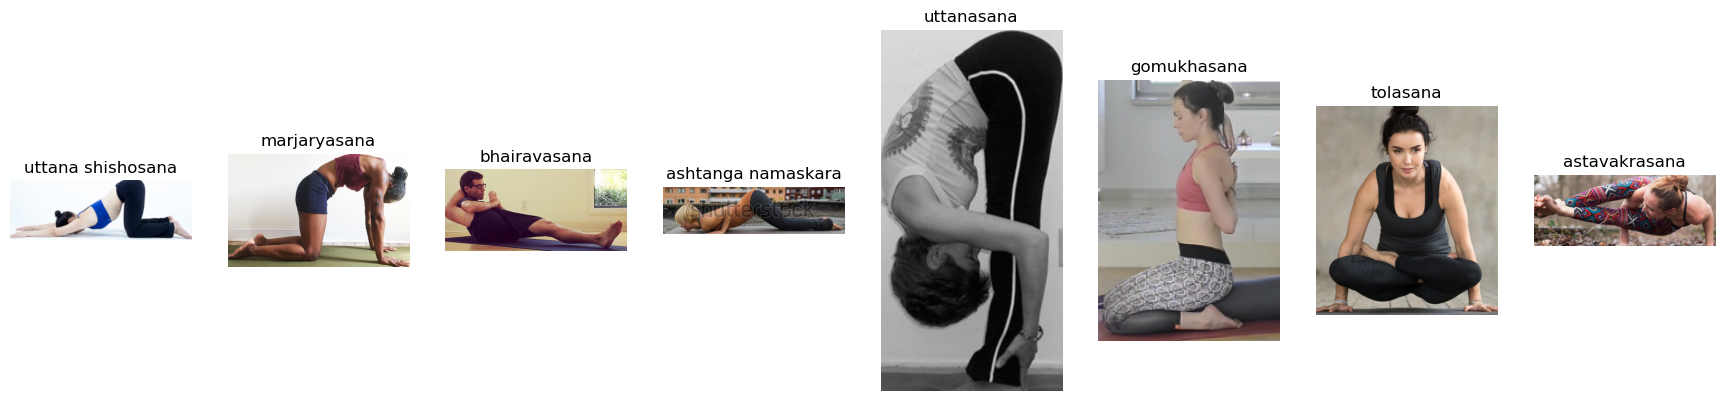

In [5]:
show_images(generator)

---
### Cycle 1
- ÏÇ¨Ïö©Ìïú ÏÇ¨Ï†ÑÌõàÎ†® Î™®Îç∏ : `Resnet50`
- ÏÇ¨Ïö©Ìïú Î∂ÑÎ•òÍ∏∞

<code>
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(500, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(107, activation='softmax', name='output')(x)
</code>

- Total params : 24,642,907
- Albumentation Ï†ÅÏö© X
- Learning_rate : default
- ÌõàÎ†® Epoch : 10 / 10


<style>
    table {
        margin-left: 0;
    }
</style>

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>Train</th>
        <th>Validation</th>
        <th>Test</th>
    </tr>
    <tr>
        <td>Accuracy</td>
        <td>0.7923</td>
        <td>0.6131</td>
        <td>0.6549</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>0.6484</td>
        <td>1.5691</td>
        <td>1.3843</td>
    </tr>
</table>

- history ÏãúÍ∞ÅÌôî
  
<img src="./images/yoga/cycle1_history.png" width="500px">

- ÏòàÏ∏° ÏàòÌñâ
<img src="./images/yoga/cycle1_prediction.png" width="1200px">

- ÏûÑÏùò ÏòàÏ∏° ÏàòÌñâÌïú Í≤∞Í≥º, 4Í∞ú Ï§ëÏóê 2Í∞ú ÎßûÏ∂îÎäî Í≤ÉÏùÑ ÌôïÏù∏ÌñàÏäµÎãàÎã§.
- Ï°∞Í∏àÎçî Ï†ïÌôïÎèÑÎ•º Ïò¨Î¶¨Í∏∞ ÏúÑÌï¥ EpochÎ•º 20ÏúºÎ°ú Ï°∞Ï†ïÌï©ÎãàÎã§.

---
### Cycle 2
- ÏÇ¨Ïö©Ìïú ÏÇ¨Ï†ÑÌõàÎ†® Î™®Îç∏ : `Resnet50`
- ÏÇ¨Ïö©Ìïú Î∂ÑÎ•òÍ∏∞

<code>
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(500, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(107, activation='softmax', name='output')(x)
</code>

- Total params : 24,642,907
- Albumentation Ï†ÅÏö© X
- Learning_rate : default
- ÌõàÎ†® Epoch : 19 / 20


<style>
    table {
        margin-left: 0;
    }
</style>

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>Train</th>
        <th>Validation</th>
        <th>Test</th>
    </tr>
    <tr>
        <td>Accuracy</td>
        <td>0.9311</td>
        <td>0.5328</td>
        <td>0.5474</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>0.2236</td>
        <td>2.3378</td>
        <td>2.2350</td>
    </tr>
</table>

- history ÏãúÍ∞ÅÌôî
  
<img src="./images/yoga/cycle2_history.png" width="500px">

- Early StoppingÏù¥ Î∞úÏÉùÌñàÍ≥†, Train AccuracyÏôÄ Validation, Test Í∞ÑÏùò Ï†êÏàòÏ∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇ¨Í∏∞Ïóê ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÏßÄ ÏïäÏïòÏäµÎãàÎã§.
- Learning_rateÎ•º 1e-5Î°ú Ï°∞Ï†ïÌï©ÎãàÎã§.

---
### Cycle 3
- ÏÇ¨Ïö©Ìïú ÏÇ¨Ï†ÑÌõàÎ†® Î™®Îç∏ : `Resnet50`
- ÏÇ¨Ïö©Ìïú Î∂ÑÎ•òÍ∏∞

<code>
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(500, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(107, activation='softmax', name='output')(x)
</code>

- Total params : 24,642,907
- Albumentation Ï†ÅÏö© X
- Learning_rate : 1e-5
- ÌõàÎ†® Epoch : 20 / 20


<style>
    table {
        margin-left: 0;
    }
</style>

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>Train</th>
        <th>Validation</th>
        <th>Test</th>
    </tr>
    <tr>
        <td>Accuracy</td>
        <td>0.2391</td>
        <td>0.1929</td>
        <td>----</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>3.4028</td>
        <td>3.9271</td>
        <td>----</td>
    </tr>
</table>

Learning_rateÎ•º 1e-5Î°ú Ï°∞Ï†ïÌñàÏùÑ Îïå, ÌõàÎ†®ÌïòÎäî ÏÜçÎèÑÍ∞Ä ÎÑàÎ¨¥ ÎÇÆÏïÑ Ïò§ÌûàÎ†§ Ï†êÏàòÍ∞Ä ÎÇÆÍ≤å ÎÇòÏò¥ÏùÑ Ïïå Ïàò ÏûàÏóàÏäµÎãàÎã§.  
Learning_rateÎ•º 5e-4Î°ú ÏàòÏπòÎ•º Ï°∞Ï†ïÌï©ÎãàÎã§.

---
### Cycle 4
- ÏÇ¨Ïö©Ìïú ÏÇ¨Ï†ÑÌõàÎ†® Î™®Îç∏ : `Resnet50`
- ÏÇ¨Ïö©Ìïú Î∂ÑÎ•òÍ∏∞

<code>
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(500, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(107, activation='softmax', name='output')(x)
</code>

- Total params : 24,642,907
- Albumentation Ï†ÅÏö© X
- Learning_rate : 5e-4
- ÌõàÎ†® Epoch : 15 / 20


<style>
    table {
        margin-left: 0;
    }
</style>

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>Train</th>
        <th>Validation</th>
        <th>Test</th>
    </tr>
    <tr>
        <td>Accuracy</td>
        <td>0.9435</td>
        <td>0.5839</td>
        <td>0.5990</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>0.1973</td>
        <td>2.1181</td>
        <td>1.9288</td>
    </tr>
</table>

- history ÏãúÍ∞ÅÌôî
  
<img src="./images/yoga/cycle4_history.png" width="500px">

- ÏòàÏ∏° ÏàòÌñâ
<img src="./images/yoga/cycle4_prediction.png" width="1200px">

- ÏûÑÏùò ÏòàÏ∏° ÏàòÌñâÌïú Í≤∞Í≥º, 4Í∞ú Ï§ëÏóê 4Í∞úÎ•º ÎßûÏ∂îÏóàÏßÄÎßå, Ïó¨Ï†ÑÌûà TrainÍ≥º Validation & Test Í∞ÑÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇ®ÏùÑ Ïïå Ïàò ÏûàÏóàÏäµÎãàÎã§.
- Ïù¥Î•º Ï°∞Ï†ïÌïòÍ∏∞ ÏúÑÌï¥ AlbumentationÏùÑ Ï†ÅÏö©Ìï©ÎãàÎã§.

---
### Cycle 5
- ÏÇ¨Ïö©Ìïú ÏÇ¨Ï†ÑÌõàÎ†® Î™®Îç∏ : `Resnet50`
- ÏÇ¨Ïö©Ìïú Î∂ÑÎ•òÍ∏∞


<code>
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(500, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(107, activation='softmax', name='output')(x)
</code>

- Total params : 24,642,907
- Albumentation Ï†ÅÏö© O

<code>
    aug = A.Compose([
        A.ShiftScaleRotate(p=0.5),
        A.HorizontalFlip(p=0.5),
        A.GaussNoise(p=0.5, var_limit=(400, 900)),
        A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
    ])

</code>

- Learning_rate : 5e-4
- ÌõàÎ†® Epoch : 20 / 20


<style>
    table {
        margin-left: 0;
    }
</style>

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>Train</th>
        <th>Validation</th>
        <th>Test</th>
    </tr>
    <tr>
        <td>Accuracy</td>
        <td>0.7447</td>
        <td>0.5954</td>
        <td>0.6690</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>0.8601</td>
        <td>1.6137</td>
        <td>1.4335</td>
    </tr>
</table>

- history ÏãúÍ∞ÅÌôî
  
<img src="./images/yoga/cycle5_history.png" width="500px">

- ÏòàÏ∏° ÏàòÌñâ
<img src="./images/yoga/cycle5_prediction.png" width="1200px">

- AlbumentationÏùÑ Ï†ÅÏö©ÌñàÏùÑ Îïå, Train Ï†êÏàòÎäî Îñ®Ïñ¥Ï°åÏßÄÎßå TrainÍ≥º Validation & Test Í∞ÑÏùò Ï†êÏàò Ï∞®Ïù¥Í∞Ä Ï§ÑÏñ¥Îì§ÏóàÏäµÎãàÎã§.
- ÏûÑÏùò ÏòàÏ∏° ÏàòÌñâÌïú Í≤∞Í≥º, 4Í∞ú Ï§ëÏóê 2Í∞úÎ•º ÎßûÏ∂îÏóàÏäµÎãàÎã§.
- MobileNetÏúºÎ°ú Î≥ÄÍ≤ΩÌï¥ÏÑú Îã§Ïãú Ï†êÏàò ÏòàÏ∏°ÏùÑ ÏàòÌñâÌï©ÎãàÎã§.

---
### Cycle 6
- ÏÇ¨Ïö©Ìïú ÏÇ¨Ï†ÑÌõàÎ†® Î™®Îç∏ : `MobileNet`
- ÏÇ¨Ïö©Ìïú Î∂ÑÎ•òÍ∏∞


<code>
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(500, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(107, activation='softmax', name='output')(x)
</code>

- Total params : 2,952,091
- Albumentation Ï†ÅÏö© O

<code>
    aug = A.Compose([
        A.ShiftScaleRotate(p=0.5),
        A.HorizontalFlip(p=0.5),
        A.GaussNoise(p=0.5, var_limit=(400, 900)),
        A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
    ])

</code>

- Learning_rate : 5e-4
- ÌõàÎ†® Epoch : 8 / 20


<style>
    table {
        margin-left: 0;
    }
</style>

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>Train</th>
        <th>Validation</th>
        <th>Test</th>
    </tr>
    <tr>
        <td>Accuracy</td>
        <td>0.4906</td>
        <td>0.1773</td>
        <td>----</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>1.8437</td>
        <td>4.2066</td>
        <td>----</td>
    </tr>
</table>

MobileNetÏúºÎ°ú Î≥ÄÍ≤ΩÌïòÏòÄÏùÑ Îïå, Ïò§ÌûàÎ†§ Ï†êÏàòÍ∞Ä Îß§Ïö∞ ÎÇÆÍ≤å ÎÇòÏò¥Í≥º ÎèôÏãúÏóê, EarlyStoppingÏúºÎ°ú ÌõàÎ†®Ïù¥ Ï°∞Í∏∞ Ï¢ÖÎ£åÍ∞Ä ÎêòÏóàÏäµÎãàÎã§.  
Í∞ïÏÇ¨ÎãòÍªò ÏûêÎ¨∏ÏùÑ Íµ¨ÌïúÍ≤∞Í≥º Ìö®Ïú®Ïù¥ Ï¢ãÏùÄ EfficientNetÏù¥ ÏûàÎã§Îäî Í≤ÉÏùÑ ÏïåÍ≥† EfficientNetÏúºÎ°ú ÌõàÎ†®ÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.

---
### Cycle 7
- ÏÇ¨Ïö©Ìïú ÏÇ¨Ï†ÑÌõàÎ†® Î™®Îç∏ : `EfficientNet`
- ÏÇ¨Ïö©Ìïú Î∂ÑÎ•òÍ∏∞


<code>
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(500, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(107, activation='softmax', name='output')(x)
</code>

- Total params : 4,743,678
- Albumentation Ï†ÅÏö© O

<code>
    aug = A.Compose([
        A.ShiftScaleRotate(p=0.5),
        A.HorizontalFlip(p=0.5),
        A.GaussNoise(p=0.5, var_limit=(400, 900)),
        A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
    ])

</code>

- Learning_rate : 5e-4
- ÌõàÎ†® Epoch : 20 / 20


<style>
    table {
        margin-left: 0;
    }
</style>

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>Train</th>
        <th>Validation</th>
        <th>Test</th>
    </tr>
    <tr>
        <td>Accuracy</td>
        <td>0.8959</td>
        <td>0.7205</td>
        <td>0.7300</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>0.3304</td>
        <td>1.4324</td>
        <td>1.2517</td>
    </tr>
</table>

- history ÏãúÍ∞ÅÌôî
  
<img src="./images/yoga/cycle7_history.png" width="500px">

- Îã§Ï§ë ÏòàÏ∏° ÏàòÌñâ

<img src="./images/yoga/cycle7_prediction.png" width="1200px">


- EfficientNetÏúºÎ°ú ÏàòÌñâÌñàÏùÑ Îïå TrainÍ≥º Validaion & Test Ï†êÏàò Ï∞®Ïù¥Í∞Ä Í∞ÄÏû• Ï†ÅÍ≤å ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.
- ÎòêÌïú ÏûÑÏùò ÏòàÏ∏° ÏàòÌñâ Ïãú ÏòàÏ∏° Í≤∞Í≥º ÎòêÌïú Ïûò ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.


- Ïô∏Î∂Ä Ïù¥ÎØ∏ÏßÄ ÏòàÏ∏° ÏàòÌñâ

<img src="./images/yoga/cycle7_predict_image_pre.png" width="1200px">
<img src="./images/yoga/cycle7_predict_image_from_web.png" width="1200px">

**Ïô∏Î∂Ä Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌï¥ ÏòàÏ∏°ÏùÑ Ïûò ÌïòÎäî Í≤ÉÏùÑ ÌôïÏù∏ÌïòÏòÄÏäµÎãàÎã§.**



---
### Cycle 8
- ÏÇ¨Ïö©Ìïú ÏÇ¨Ï†ÑÌõàÎ†® Î™®Îç∏ : `VGG16`
- ÏÇ¨Ïö©Ìïú Î∂ÑÎ•òÍ∏∞


<code>
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(500, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(107, activation='softmax', name='output')(x)
</code>

- Total params : 15,024,795
- Albumentation Ï†ÅÏö© O

<code>
    aug = A.Compose([
        A.ShiftScaleRotate(p=0.5),
        A.HorizontalFlip(p=0.5),
        A.GaussNoise(p=0.5, var_limit=(400, 900)),
        A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
    ])

</code>

- Learning_rate : 5e-4
- ÌõàÎ†® Epoch : 8 / 20


<style>
    table {
        margin-left: 0;
    }
</style>

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>Train</th>
        <th>Validation</th>
        <th>Test</th>
    </tr>
    <tr>
        <td>Accuracy</td>
        <td>0.0126</td>
        <td>0.0146</td>
        <td>----</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>4.6584</td>
        <td>4.6538</td>
        <td>----</td>
    </tr>
</table>

VGG16ÏúºÎ°ú Î≥ÄÍ≤ΩÌïòÏòÄÏùÑ Îïå, Train Ï†êÏàòÏôÄ Validation Ï†êÏàòÍ∞Ä ÎÇÆÍ≤å ÎÇòÌÉÄÎÇ®Í≥º ÎèôÏãúÏóê Early StoppingÏù¥ Î∞úÏÉùÌñàÏäµÎãàÎã§.

---
### Score Per Cycles

<img src="./images/yoga/Cycle_bar_plot.png" width="1200px">

### Ï†ïÎ¶¨
- Í∞Å Cycle Î≥Ñ Îã§Î•∏ Î™®Îç∏Í≥º Ï†êÏàòÎ•º ÎπÑÍµêÌï¥Î≥¥ÏïòÏùÑ Îïå, Cycle 7ÏóêÏÑú Í∞ÄÏû• ÏïàÏ†ïÏ†ÅÏúºÎ°ú  
  Train, Validation, Test Accuracy Ï†êÏàòÍ∞Ä ÏïàÏ†ïÏ†ÅÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Í≥† loss Í∞íÎèÑ ÏïàÏ†ïÏ†ÅÏù¥Í≤å ÎÇÆÍ≤å ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.

### üö©ÎäêÎÇÄ Ï†ê

1. Î™®Îç∏ ÎπÑÍµê Î∞è ÏÑ±Îä• Ï∞®Ïù¥:
- Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑú Resnet, Mobilenet, VGG16, EfficientNetÏùò ÏÇ¨Ï†Ñ ÌõàÎ†® Î™®Îç∏ÏùÑ Ïù¥Ïö©ÌïòÏó¨ Îã§ÏñëÌïú Ïã§ÌóòÏùÑ ÏàòÌñâÌñàÏäµÎãàÎã§. Ïù¥ Í≥ºÏ†ïÏóêÏÑú Î™®Îç∏ÎßàÎã§ ÏÑ±Îä• Ï∞®Ïù¥Í∞Ä ÌôïÏó∞ÌïòÍ≤å ÎìúÎü¨ÎÇ¨ÏäµÎãàÎã§.
- ÌäπÌûà MobilenetÍ≥º VGG16ÏùÄ Í∞ôÏùÄ Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï Í∏∞Î≤ï(albumentation)Í≥º ÌïôÏäµÎ•†(learning rate), Î∂ÑÎ•òÍ∏∞Î•º ÏÇ¨Ïö©ÌñàÏùåÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Ï†êÏàòÍ∞Ä Îß§Ïö∞ ÎÇÆÍ≤å ÎÇòÏôîÏäµÎãàÎã§. Ïù¥Îäî Ï†ÄÏö©Îüâ Î™®Îç∏Îì§Ïù¥ Í≥†Ìï¥ÏÉÅÎèÑ Ïù¥ÎØ∏ÏßÄÎÇò Î≥µÏû°Ìïú Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨ÌïòÎäî Îç∞ ÌïúÍ≥ÑÍ∞Ä ÏûàÏùåÏùÑ ÎäêÍºáÏäµÎãàÎã§.

2. Ìö®Ïú®ÏÑ±Ïùò Ï§ëÏöîÏÑ±:
- EfficientNetÏùÑ ÏÇ¨Ïö©ÌñàÏùÑ Îïå Í∞ÄÏû• ÏïàÏ†ïÏ†ÅÏù∏ ÏÑ±Îä•ÏùÑ Î≥¥ÏòÄÏäµÎãàÎã§.  
  Train, Validation, Test ÏÑ∏Ìä∏ÏóêÏÑúÏùò AccuracyÏôÄ LossÍ∞Ä Í∞ÄÏû• Í∑†ÌòïÏûàÍ≥† ÎÇÆÍ≤å ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.
- Ïù¥Îäî EfficientNetÏù¥ ÏµúÏã† Î™®Îç∏Î°úÏÑú ÎÜíÏùÄ Ìö®Ïú®ÏÑ±Í≥º ÏÑ±Îä•ÏùÑ Ï†úÍ≥µÌïúÎã§Îäî Í≤ÉÏùÑ Îã§Ïãú Ìïú Î≤à ÌôïÏù∏ÌïòÍ≤å Ìï¥Ï£ºÏóàÏäµÎãàÎã§.

3. Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏÑ±:
- Í≥†Ïö©Îüâ Î∞è Í≥†Ìï¥ÏÉÅÎèÑ Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î•º ÌõàÎ†®ÏãúÌÇ¨ ÎïåÎäî ResnetÍ≥º EfficientNet Î™®Îç∏Ïù¥ Í∞ÄÏû• Ìö®Í≥ºÏ†ÅÏù¥ÎùºÎäî Í≤∞Î°†Ïóê ÎèÑÎã¨ÌñàÏäµÎãàÎã§.
- Ïù¥Îäî Ïù¥Îì§ Î™®Îç∏Ïù¥ Î≥µÏû°Ìïú Ìå®ÌÑ¥Í≥º Í≥†Ï∞®Ïõê ÌäπÏßïÏùÑ Ïûò ÌïôÏäµÌï† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏ÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§.

4. ÏïåÍ≥†Î¶¨Ï¶ò ÏÑ†ÌÉùÏùò Ï§ëÏöîÏÑ±:
- Îã§ÏñëÌïú Î™®Îç∏ÏùÑ ÏãúÎèÑÌï¥Î¥ÑÏúºÎ°úÏç® ÌäπÏ†ï Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Í∞ÄÏû• Ï†ÅÌï©Ìïú ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÏÑ†ÌÉùÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌïòÎã§Îäî Í≤ÉÏùÑ Îã§Ïãú Ìïú Î≤à Íπ®Îã¨ÏïòÏäµÎãàÎã§.
- Ìö®Ïú®ÏÑ±Ïù¥ Ï¢ãÏùÄ Î™®Îç∏ÏùÑ ÏÑ†ÌÉùÌï®ÏúºÎ°úÏç® Îçî ÎÇòÏùÄ ÏÑ±Îä•ÏùÑ Îã¨ÏÑ±Ìï† Ïàò ÏûàÏùåÏùÑ ÌôïÏù∏ÌñàÏäµÎãàÎã§.

5. ÏûêÎ¨∏Í≥º ÌîºÎìúÎ∞±Ïùò Í∞ÄÏπò:
- Í∞ïÏÇ¨ÎãòÍªò ÏûêÎ¨∏ÏùÑ Íµ¨ÌïòÍ≥† ÌîºÎìúÎ∞±ÏùÑ Î∞òÏòÅÌïòÏó¨ EfficientNetÏùÑ ÏãúÎèÑÌï¥Î≥∏ Í≤ÉÏù¥ ÌÅ∞ ÎèÑÏõÄÏù¥ ÎêòÏóàÏäµÎãàÎã§. Ïù¥Îäî ÌîÑÎ°úÏ†ùÌä∏ ÏßÑÌñâ Ïãú Ïô∏Î∂ÄÏùò Ï†ÑÎ¨∏Í∞Ä ÏùòÍ≤¨ÏùÑ Îì£Í≥† Î∞òÏòÅÌïòÎäî Í≤ÉÏù¥ Îß§Ïö∞ Ï§ëÏöîÌïòÎã§Îäî Ï†êÏùÑ Íπ®Îã¨ÏïòÏäµÎãàÎã§.
